In [25]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline

In [26]:
df_clv = pd.read_csv("CLV_Analysis_Dataset.csv")

In [27]:
df_clv.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [28]:
df_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [29]:
df_clv.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02-03-2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [30]:
df_clv.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [31]:
# drop the Customer ID column
df_clv.drop(['Customer'], axis=1, inplace=True)

In [32]:
#Change object into categorical variable
df_clv['State'] = df_clv['State'].astype('category')
df_clv['Response'] = df_clv['Response'].astype('category')
df_clv['Coverage'] = df_clv['Coverage'].astype('category')
df_clv['Education'] = df_clv['Education'].astype('category')
df_clv['Effective To Date'] = df_clv['Effective To Date'].astype('category')
df_clv['EmploymentStatus'] = df_clv['EmploymentStatus'].astype('category')
df_clv['Gender'] = df_clv['Gender'].astype('category')
df_clv['Location Code'] = df_clv['Location Code'].astype('category')
df_clv['Marital Status'] = df_clv['Marital Status'].astype('category')
df_clv['Policy Type'] = df_clv['Policy Type'].astype('category')
df_clv['Policy'] = df_clv['Policy'].astype('category')
df_clv['Renew Offer Type'] = df_clv['Renew Offer Type'].astype('category')
df_clv['Sales Channel'] = df_clv['Sales Channel'].astype('category')
df_clv['Vehicle Class'] = df_clv['Vehicle Class'].astype('category')
df_clv['Vehicle Size'] = df_clv['Vehicle Size'].astype('category')

In [33]:
#Use category codes instead of strings
df_clv['State'] = df_clv['State'].cat.codes
df_clv['Response'] = df_clv['Response'].cat.codes
df_clv['Coverage'] = df_clv['Coverage'].cat.codes
df_clv['Education'] = df_clv['Education'].cat.codes
df_clv['Effective To Date'] = df_clv['Effective To Date'].cat.codes
df_clv['EmploymentStatus'] = df_clv['EmploymentStatus'].cat.codes
df_clv['Gender'] = df_clv['Gender'].cat.codes
df_clv['Location Code'] = df_clv['Location Code'].cat.codes
df_clv['Marital Status'] = df_clv['Marital Status'].cat.codes
df_clv['Policy Type'] = df_clv['Policy Type'].cat.codes
df_clv['Policy'] = df_clv['Policy'].cat.codes
df_clv['Renew Offer Type'] = df_clv['Renew Offer Type'].cat.codes
df_clv['Sales Channel'] = df_clv['Sales Channel'].cat.codes
df_clv['Vehicle Class'] = df_clv['Vehicle Class'].cat.codes
df_clv['Vehicle Size'] = df_clv['Vehicle Size'].cat.codes

<b> Model Building </b>

In [34]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

In [84]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report, balanced_accuracy_score, accuracy_score, precision_score, recall_score
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  roc_curve, auc
from   sklearn.model_selection  import  KFold, cross_val_score
from   sklearn.model_selection  import  train_test_split

In [36]:
X = df_clv[['State','Customer Lifetime Value','Coverage','Education', 
          'EmploymentStatus', 'Gender', 'Income', 'Location Code','Marital Status', 'Monthly Premium Auto',
            'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies',
           'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']]
y = df_clv[['Response']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [38]:
#This explains stratify=y
y_test['Response'].value_counts()

0    2348
1     393
Name: Response, dtype: int64

In [39]:
y_train['Response'].value_counts()

0    5478
1     915
Name: Response, dtype: int64

In [40]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_split = 5)

**TRAINING**

In [41]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [42]:
predicted_train = clf.predict(X_train)

In [43]:
#Metrics
#print("Training Data Balanced Accuracy:",metrics.balanced_accuracy_score(y_train, predicted_train))
print("Training Data Accuracy:",metrics.accuracy_score(y_train, predicted_train))
print("Training Data Precision:",metrics.precision_score(y_train, predicted_train))
print("Training Data Recall:",metrics.recall_score(y_train, predicted_train))

Training Data Accuracy: 0.8740810261223213
Training Data Precision: 0.8160919540229885
Training Data Recall: 0.1551912568306011


In [44]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5478
           1       0.82      0.16      0.26       915

    accuracy                           0.87      6393
   macro avg       0.85      0.57      0.60      6393
weighted avg       0.87      0.87      0.84      6393



<b> GridSearch </b>

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

In [75]:
dt_range = list(range(1,12))
min_sample_split_S = list(range(2,8))
params      =   dict(max_depth = dt_range, min_samples_split = min_sample_split_S)
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
scoring_fn = 'accuracy'

grid = GridSearchCV(clf, params, cv = cv_sets, scoring=scoring_fn)

In [76]:
grid.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(6393, n_iter=10, test_size=0.2, random_state=0),
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_split=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

In [77]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_split=3)

In [78]:
grid.cv_results_

{'mean_fit_time': array([0.0106729 , 0.00903821, 0.00956073, 0.00859237, 0.0090425 ,
        0.00890203, 0.01177728, 0.01214128, 0.01174631, 0.01183221,
        0.01140342, 0.01144941, 0.01460114, 0.01433475, 0.01447001,
        0.01529422, 0.01467373, 0.01445897, 0.01784744, 0.01725311,
        0.01716323, 0.01765711, 0.01758068, 0.01692951, 0.02029691,
        0.02033756, 0.02070203, 0.01977651, 0.02094696, 0.02055092,
        0.02193749, 0.02289572, 0.02296312, 0.02313359, 0.02334573,
        0.02282808, 0.02541347, 0.0240032 , 0.02461846, 0.02426288,
        0.0248322 , 0.02401872, 0.02548702, 0.02619593, 0.02639401,
        0.02606091, 0.02641513, 0.02672145, 0.02766995, 0.02821717,
        0.02706175, 0.02726276, 0.02746549, 0.02792087, 0.02922883,
        0.02877419, 0.02912421, 0.02875166, 0.02904608, 0.02919803,
        0.03021839, 0.02988276, 0.03235235, 0.03047221, 0.02904856,
        0.03095067]),
 'mean_score_time': array([0.0026638 , 0.00221498, 0.00226216, 0.00219734, 0.

Now that we have finetuned the hyperparameter, let us create clf object with tuned parameters & train & test.

In [79]:
clf_grid = tree.DecisionTreeClassifier(criterion="gini", max_depth = 11, min_samples_split = 3)

In [80]:
clf_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=3)

In [82]:
predicted_train_grid = clf_grid.predict(X_train)

In [85]:
#Metrics
print("Training Data Balanced Accuracy:",metrics.balanced_accuracy_score(y_train, predicted_train_grid))
print("Training Data Accuracy:",metrics.accuracy_score(y_train, predicted_train_grid))
print("Training Data Precision:",metrics.precision_score(y_train, predicted_train_grid))
print("Training Data Recall:",metrics.recall_score(y_train, predicted_train_grid))

Training Data Balanced Accuracy: 0.8110082655510268
Training Data Accuracy: 0.9382136712028781
Training Data Precision: 0.9075235109717869
Training Data Recall: 0.6327868852459017


**TESTING**

In [86]:
predicted_test = clf_grid.predict(X_test)

In [87]:
print("Test Set Balanced Accuracy:",metrics.balanced_accuracy_score(y_test, predicted_test))
print("Test Set Accuracy:",metrics.accuracy_score(y_test, predicted_test))
print("Test Set Precision:",metrics.precision_score(y_test, predicted_test))
print("Test Set Recall:",metrics.recall_score(y_test, predicted_test))

Test Set Balanced Accuracy: 0.7694367140460616
Test Set Accuracy: 0.9098869025902955
Test Set Precision: 0.7401315789473685
Test Set Recall: 0.5725190839694656


In [88]:
measures_test      = classification_report(y_test, predicted_test) 
print("\nTesting data")
print(measures_test) 


Testing data
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2348
           1       0.74      0.57      0.65       393

    accuracy                           0.91      2741
   macro avg       0.84      0.77      0.80      2741
weighted avg       0.90      0.91      0.90      2741



<b>  Understand feature importances in this model </b>

{'State': 0.0016548835612680216, 'Customer Lifetime Value': 0.12417097323074758, 'Response': 0.012647299859530031, 'Coverage': 0.03746764994654437, 'Education': 0.1230759058437066, 'Effective To Date': 0.0, 'EmploymentStatus': 0.11967270099735067, 'Gender': 0.011766418694996665, 'Income': 0.026927430525997414, 'Location Code': 0.07100029485534586, 'Marital Status': 0.03699502787522433, 'Monthly Premium Auto': 0.09205572243794838, 'Months Since Last Claim': 0.0243802794164868, 'Months Since Policy Inception': 0.021042791052756325, 'Number of Open Complaints': 0.0, 'Number of Policies': 0.0, 'Policy Type': 0.10476551777500163, 'Policy': 0.013196105264135501, 'Renew Offer Type': 0.13020732908052476, 'Sales Channel': 0.026561855039792664, 'Total Claim Amount': 0.022411814542642572}


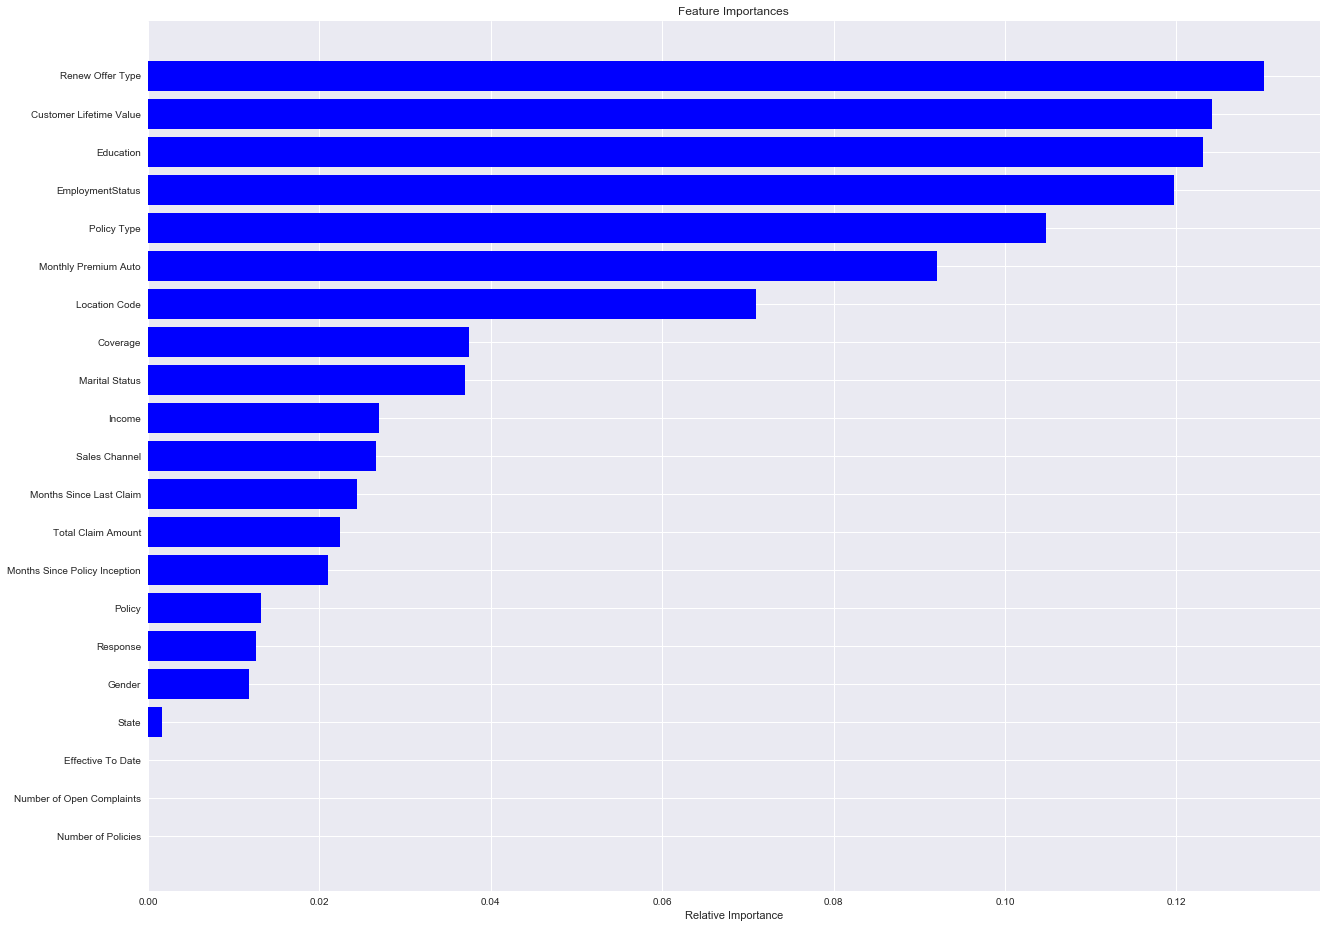

In [89]:
import matplotlib.pyplot as plt
print(dict(zip(df_clv.columns, clf_grid.feature_importances_)))

feature_names = df_clv.columns
importances = clf_grid.feature_importances_
indices     = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<b> **Visualize the tree - Interpretability!** </b>

In [90]:
#from sklearn import tree 
from sklearn.tree import plot_tree

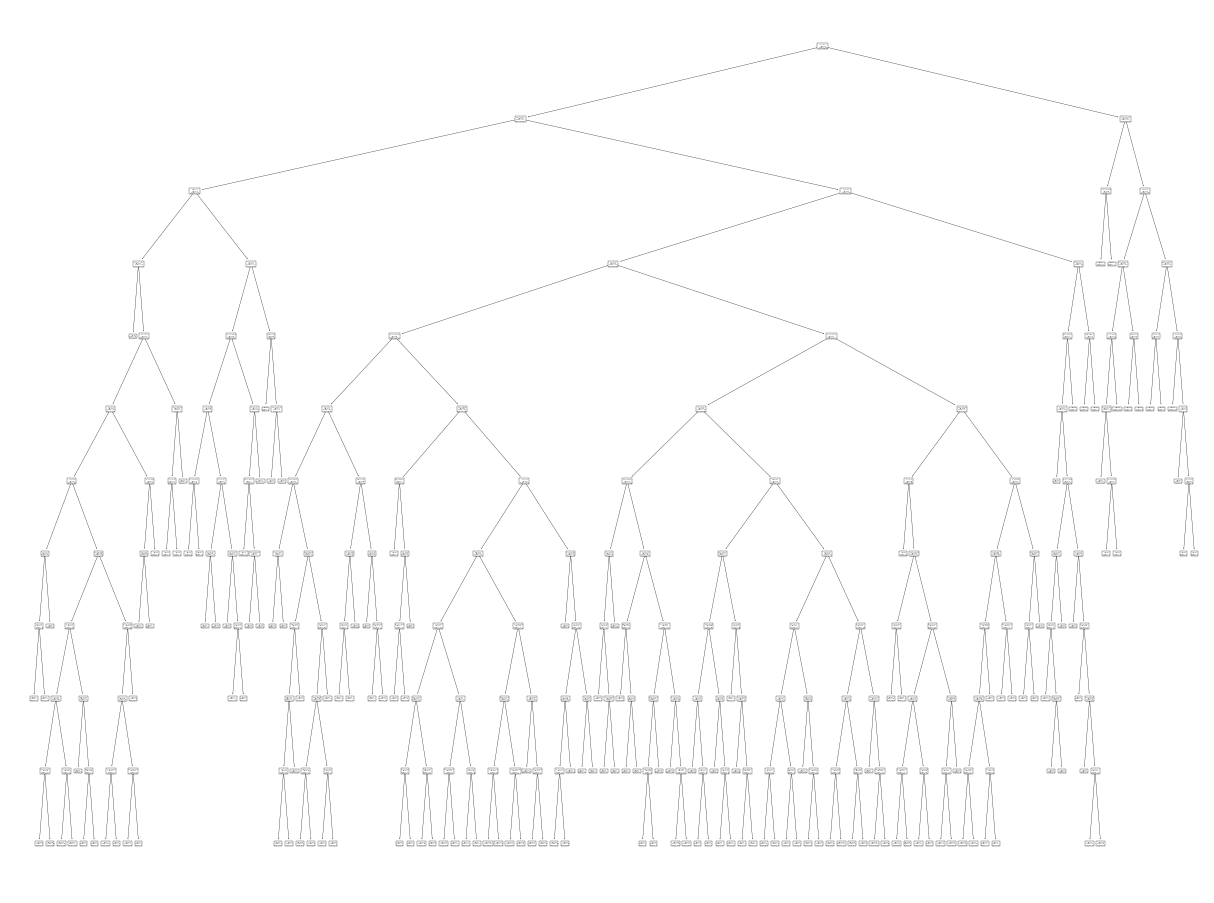

In [91]:
plt.rcParams["figure.figsize"] = [21,16]
tree.plot_tree(clf_grid)

<b> Export tree as picture </b>

In [106]:
def decision_tree_with_pruning(clf_grid, X, y, flist, file_name):
    from sklearn.tree            import export_graphviz
    from sklearn.externals.six   import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot
    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(clf_grid, out_file = file_name_dot, feature_names = flist,
                    class_names = ['No' , 'Yes'],
                    filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file("/Users/anand/Documents/GL_Guru/"+file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

In [108]:
features = X.columns
decision_tree_with_pruning(clf_grid,X,y, features, 'Mktg_CLV_Tree_exported5')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [95]:
X.columns

Index(['State', 'Customer Lifetime Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')